In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



In [2]:

data2 = np.genfromtxt('dark_comet_data.csv',delimiter=',',dtype=str,usecols=np.arange(0,21))#,skip_header=14)
#a1 12 a2 15 a3 18
numobjects = 14
A2 = np.zeros(numobjects)
A1 = np.zeros(numobjects)
A3 = np.zeros(numobjects)
mag = np.zeros(numobjects)
TJ=np.zeros(numobjects)

a_DC= np.zeros(numobjects)
e_DC=np.zeros(numobjects)

cnt=0
dc_names=[]
for i in np.arange(2,len(data2)):
    try:
        if (np.abs(float(data2[i][17])) >2.5):
            A2[cnt]= float(data2[i][15])
    except:
        pass
    try:
        if (np.abs(float(data2[i][14])) >2.5):
            A1[cnt]= float(data2[i][12])
    except:
        pass
    try:
        if (np.abs(float(data2[i][20])) >2.5):
            A3[cnt]= float(data2[i][18])
    except:
        pass
    try:
        mag[cnt]=float(data2[i][7])
    except:
        pass
    try:
        TJ[cnt]=float(data2[i][6])
    except:
        pass
    try:
        a_DC[cnt]=float(data2[i][2])
    except:
        pass
    try:
        e_DC[cnt]=float(data2[i][3])
    except:
        pass
    dc_names.append(data2[i][1])
    cnt+=1


In [4]:
conversion = 20.04
Amag= np.sqrt(A1**2+A2**2+A3**2)

Diameters_DC= 10**(-0.2*mag) *1329./np.sqrt(0.1)

mass_DC=(Diameters_DC/2.*1e5)**3*4./3.*np.pi

mass_loss_dC_gs=Amag*conversion/350.*mass_DC


1998 KY$_{26}$


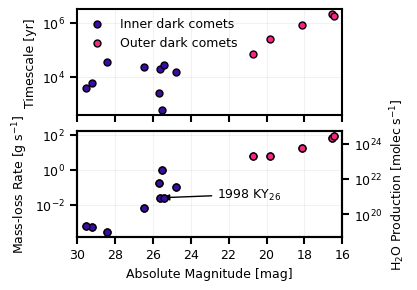

In [5]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(2, 1, tight_layout=False,figsize=(8.7*cm,7.5*cm),sharex=True,sharey=False
                       ,gridspec_kw={'hspace': 0.15, 'wspace': 0.3})
linewidth=1
size=25

axs[0].scatter(mag[(TJ>3.1)],350./(Amag[(TJ>3.1)]*conversion)/(365.*60*60*24.),
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Inner dark comets ')
axs[0].scatter(mag[(TJ<3.1) & (TJ>1)],350./(Amag[(TJ<3.1) & (TJ>1)]*conversion)/(365.*60*60*24.),
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Outer dark comets ')

axs[0].grid(color='k',alpha=0.05)
axs[0].set_yscale('log')

axs[0].set_xlim([30,15])

axs[0].legend(fancybox=True, framealpha=1, shadow=False, borderpad=.12,#bbox_to_anchor=(1.04,.3755),
            frameon=False, loc='upper left')#, ncol=1,prop={'size': 16},facecolor='none')



axs[1].scatter(mag[(TJ>3.1)],(Amag[(TJ>3.1)]*conversion)/350.*mass_DC[(TJ>3.1)],
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Inner dark comets ')
axs[1].scatter(mag[(TJ<3.1) & (TJ>1)],(Amag[(TJ<3.1) & (TJ>1)]*conversion)/350.*mass_DC[(TJ<3.1) & (TJ>1)],
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Outer dark comets ')


print(dc_names[7])


axs[1].annotate(dc_names[7],xy=((mag[7],(Amag[7]*conversion)/350.*mass_DC[7])),
                xytext=(mag[7]-3,(Amag[7]*conversion)/350.*mass_DC[7]),rotation=0,
                arrowprops=dict(arrowstyle= '-|>',
                             color='black',
                             lw=linewidth,
                             ls='-'))

ax2 = axs[1].twinx()  # instantiate a second Axes that shares the same x-axis

massh2o=2.9915e-23
ax2.scatter(mag[(TJ>3.1)],(Amag[(TJ>3.1)]*conversion)/350.*mass_DC[(TJ>3.1)]/massh2o,
            c='#3a0ca3',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Inner dark comets ')
ax2.scatter(mag[(TJ<3.1) & (TJ>1)],(Amag[(TJ<3.1) & (TJ>1)]*conversion)/350.*mass_DC[(TJ<3.1) & (TJ>1)]/massh2o,
            c='#f72585',marker='o',edgecolor= 'k', lw=linewidth,s=size,label=r'Outer dark comets ')
fs=9
ax2.set_yscale('log')
ax2.set_ylabel(r'H$_2$O Production [molec s$^{-1}$]',fontsize=fs)

axs[0].set_ylabel('Timescale [yr]',fontsize=fs)
axs[1].grid(color='k',alpha=0.05)
axs[1].set_yscale('log')
axs[1].set_xlim([30,16])
axs[0].set_xlim([30,16])
axs[1].set_ylabel(r'Mass-loss Rate [g s$^{-1}$]',fontsize=fs)
axs[1].set_xlabel('Absolute Magnitude [mag]',fontsize=fs)
#plt.savefig('mass_loss_rate_Darkcomets',  bbox_inches='tight', rasterize=True, dpi=300)
plt.savefig('Figure9_Massloss_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)
